<a href="https://colab.research.google.com/github/AnaChavezHdz/Art-Driven-by-Visual-Representations-of-Chemical-Space/blob/main/06_TSNE_FOODB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
from IPython.utils import io
import tqdm.notebook
import os, sys, random
total = 100
with tqdm.notebook.tqdm(total=total) as pbar:
    with io.capture_output() as captured:
      # Install rdkit
      !pip -q install rdkit
      pbar.update(100)
import pandas as pd
import numpy as np
from sys import argv

  0%|          | 0/100 [00:00<?, ?it/s]

In [58]:
# For save files at drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. t-SNE for flavor cotegory: Ground flavors

## 1.1. Load datasets

In [59]:
url = "https://raw.githubusercontent.com/AnaChavezHdz/Art-Driven-by-Visual-Representations-of-Chemical-Space/main/Datasets/01_ground_flavors_and_allFooDB.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,4,Cyanidin 3-(6''-acetyl-galactoside),CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,FOODB,UNFLAVOR,UNFLAVOR_GROUP
1,13,Cyanidin 3-(6''-succinyl-glucoside),O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,FOODB,UNFLAVOR,UNFLAVOR_GROUP


In [60]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...


## 1.2. Calculate molecular descriptors

In [61]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

[03:04:33] WARNING: not removing hydrogen atom without neighbors
[03:05:02] WARNING: not removing hydrogen atom without neighbors
[03:05:24] WARNING: not removing hydrogen atom without neighbors
[03:06:07] WARNING: not removing hydrogen atom without neighbors
[03:07:17] WARNING: not removing hydrogen atom without neighbors
[03:07:36] WARNING: not removing hydrogen atom without neighbors


,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,11,7,5,0.9528,197.67,491.425
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,12,8,8,0.7977,234.97,549.461


## 1.3. Generate t-SNE

In [62]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concat numpy array
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Create dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 53511 samples in 0.050s...
[t-SNE] Computed neighbors for 53511 samples in 2.988s...
[t-SNE] Computed conditional probabilities for sample 1000 / 53511
[t-SNE] Computed conditional probabilities for sample 2000 / 53511
[t-SNE] Computed conditional probabilities for sample 3000 / 53511
[t-SNE] Computed conditional probabilities for sample 4000 / 53511
[t-SNE] Computed conditional probabilities for sample 5000 / 53511
[t-SNE] Computed conditional probabilities for sample 6000 / 53511
[t-SNE] Computed conditional probabilities for sample 7000 / 53511
[t-SNE] Computed conditional probabilities for sample 8000 / 53511
[t-SNE] Computed conditional probabilities for sample 9000 / 53511
[t-SNE] Computed conditional probabilities for sample 10000 / 53511
[t-SNE] Computed conditional probabilities for sample 11000 / 53511
[t-SNE] Computed conditional probabilities for sample 12000 / 53511
[t-SNE] Computed conditional probabilities for sa

,FLAVOR_GROUP,component1,component2
0,UNFLAVOR_GROUP,7.196208,8.611595
1,UNFLAVOR_GROUP,8.211125,8.530029
2,UNFLAVOR_GROUP,7.096858,8.065845
3,UNFLAVOR_GROUP,7.226768,8.089017
4,UNFLAVOR_GROUP,6.050087,8.086483


## 1.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

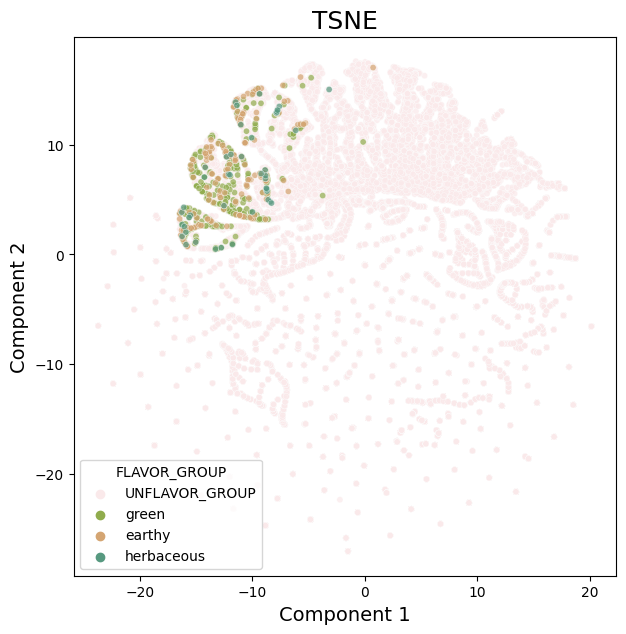

In [63]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.7,
                s = 20,
                palette = ["#fae9ea",'#90ac4d', '#d4a572','#579980']
                )
# Save figure
plt.savefig("Ground_flavors.jpg", dpi=300)

# 2. t-SNE for flavor cotegory: Wine-tasting

## 2.1. Load datasets

In [64]:
url = "https://raw.githubusercontent.com/AnaChavezHdz/Art-Driven-by-Visual-Representations-of-Chemical-Space/main/Datasets/02_wine_notes_and_allFooDB.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,4,Cyanidin 3-(6''-acetyl-galactoside),CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,FOODB,UNFLAVOR,UNFLAVOR_GROUP
1,13,Cyanidin 3-(6''-succinyl-glucoside),O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,FOODB,UNFLAVOR,UNFLAVOR_GROUP


In [65]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...


## 2.2. Calculate molecular descriptors

In [66]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

[03:11:02] WARNING: not removing hydrogen atom without neighbors
[03:11:23] WARNING: not removing hydrogen atom without neighbors
[03:11:49] WARNING: not removing hydrogen atom without neighbors
[03:12:30] WARNING: not removing hydrogen atom without neighbors
[03:13:27] WARNING: not removing hydrogen atom without neighbors
[03:13:46] WARNING: not removing hydrogen atom without neighbors


,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,11,7,5,0.9528,197.67,491.425
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,12,8,8,0.7977,234.97,549.461


## 2.3. Generate t-SNE

In [67]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concat numpy array
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Create dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 53880 samples in 0.052s...
[t-SNE] Computed neighbors for 53880 samples in 2.946s...
[t-SNE] Computed conditional probabilities for sample 1000 / 53880
[t-SNE] Computed conditional probabilities for sample 2000 / 53880
[t-SNE] Computed conditional probabilities for sample 3000 / 53880
[t-SNE] Computed conditional probabilities for sample 4000 / 53880
[t-SNE] Computed conditional probabilities for sample 5000 / 53880
[t-SNE] Computed conditional probabilities for sample 6000 / 53880
[t-SNE] Computed conditional probabilities for sample 7000 / 53880
[t-SNE] Computed conditional probabilities for sample 8000 / 53880
[t-SNE] Computed conditional probabilities for sample 9000 / 53880
[t-SNE] Computed conditional probabilities for sample 10000 / 53880
[t-SNE] Computed conditional probabilities for sample 11000 / 53880
[t-SNE] Computed conditional probabilities for sample 12000 / 53880
[t-SNE] Computed conditional probabilities for sa

,FLAVOR_GROUP,component1,component2
0,UNFLAVOR_GROUP,6.993594,8.923961
1,UNFLAVOR_GROUP,8.004933,8.87299
2,UNFLAVOR_GROUP,6.909474,8.375426
3,UNFLAVOR_GROUP,7.032186,8.396379
4,UNFLAVOR_GROUP,5.834898,8.305232


## 2.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

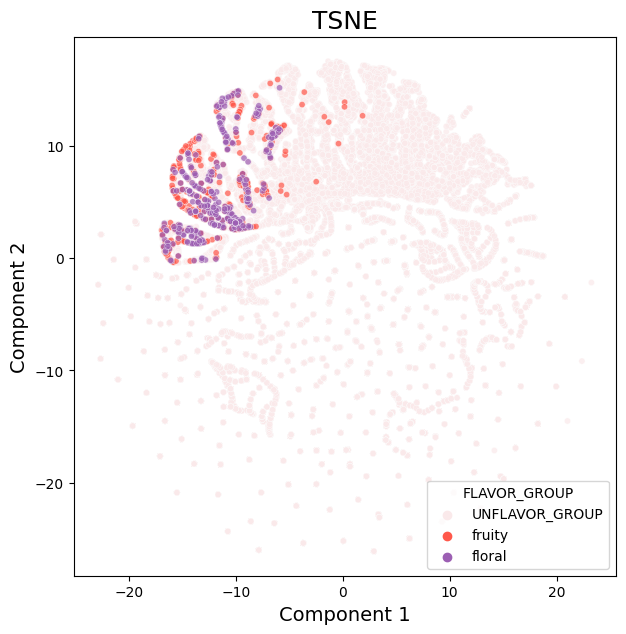

In [68]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.7,
                s = 20,
                palette = ["#fae9ea","#ff584b","#9c5fb3"]
              )
# Save figure
plt.savefig("Wine_tasting.jpg", dpi=300)

# 3. t-SNE for flavor cotegory: Spicy and Fatty

## 3.1. Load datasets

In [69]:
url = "https://raw.githubusercontent.com/AnaChavezHdz/Art-Driven-by-Visual-Representations-of-Chemical-Space/main/Datasets/03_spicy_fatty_and_allFooDB.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,4,Cyanidin 3-(6''-acetyl-galactoside),CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,FOODB,UNFLAVOR,UNFLAVOR_GROUP
1,13,Cyanidin 3-(6''-succinyl-glucoside),O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,FOODB,UNFLAVOR,UNFLAVOR_GROUP


In [70]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...


## 3.2. Calculate molecular descriptors

In [71]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

[03:17:14] WARNING: not removing hydrogen atom without neighbors
[03:17:36] WARNING: not removing hydrogen atom without neighbors
[03:18:01] WARNING: not removing hydrogen atom without neighbors
[03:18:43] WARNING: not removing hydrogen atom without neighbors
[03:19:37] WARNING: not removing hydrogen atom without neighbors
[03:19:58] WARNING: not removing hydrogen atom without neighbors


,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,11,7,5,0.9528,197.67,491.425
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,12,8,8,0.7977,234.97,549.461


### 3.3. Generate t-SNE

In [72]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concat numpy array
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Create dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 53373 samples in 0.050s...
[t-SNE] Computed neighbors for 53373 samples in 2.939s...
[t-SNE] Computed conditional probabilities for sample 1000 / 53373
[t-SNE] Computed conditional probabilities for sample 2000 / 53373
[t-SNE] Computed conditional probabilities for sample 3000 / 53373
[t-SNE] Computed conditional probabilities for sample 4000 / 53373
[t-SNE] Computed conditional probabilities for sample 5000 / 53373
[t-SNE] Computed conditional probabilities for sample 6000 / 53373
[t-SNE] Computed conditional probabilities for sample 7000 / 53373
[t-SNE] Computed conditional probabilities for sample 8000 / 53373
[t-SNE] Computed conditional probabilities for sample 9000 / 53373
[t-SNE] Computed conditional probabilities for sample 10000 / 53373
[t-SNE] Computed conditional probabilities for sample 11000 / 53373
[t-SNE] Computed conditional probabilities for sample 12000 / 53373
[t-SNE] Computed conditional probabilities for sa

,FLAVOR_GROUP,component1,component2
0,UNFLAVOR_GROUP,7.435436,8.481715
1,UNFLAVOR_GROUP,8.451673,8.366134
2,UNFLAVOR_GROUP,7.322459,7.9305
3,UNFLAVOR_GROUP,7.458578,7.956645
4,UNFLAVOR_GROUP,6.269746,7.969522


## 3.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

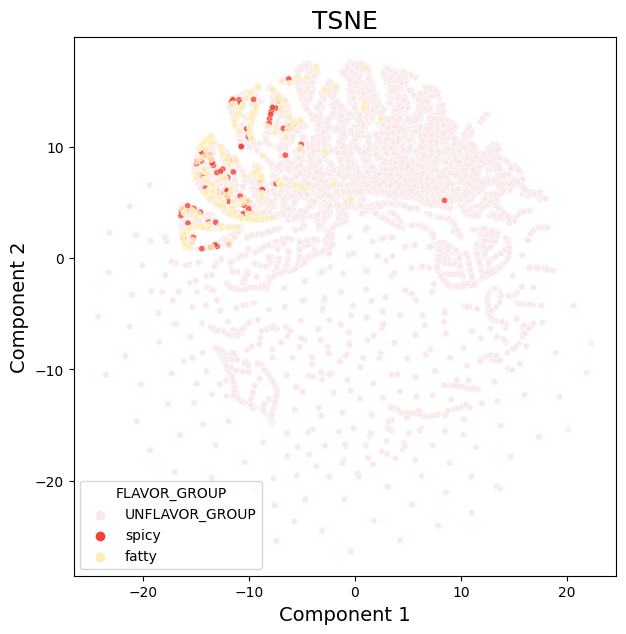

In [73]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.8,
                s = 20,
                palette = ["#fae9ea","#f44336","#ffedb7"]
                )
# Save figure
plt.savefig("Fatty_spicy.jpg", dpi=300)

# 4. t-SNE for flavor cotegory: Natural remedies

## 4.1. Load datasets

In [74]:
url = "https://raw.githubusercontent.com/AnaChavezHdz/Art-Driven-by-Visual-Representations-of-Chemical-Space/main/Datasets/04_natural_remedies_and_allFooDB.csv"
DATA = pd.read_csv(url)
DATA.head(2)

,COMPOUND_ID,NAME_FOOD_DB,NEW_SMILES,FLAVOR_ID,NAME_FLAVOR,FLAVOR_GROUP
0,4,Cyanidin 3-(6''-acetyl-galactoside),CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,FOODB,UNFLAVOR,UNFLAVOR_GROUP
1,13,Cyanidin 3-(6''-succinyl-glucoside),O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,FOODB,UNFLAVOR,UNFLAVOR_GROUP


In [75]:
DATA = DATA[['FLAVOR_GROUP', 'NEW_SMILES']]
DATA.head(2)

,FLAVOR_GROUP,NEW_SMILES
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...


## 4.2. Calculate molecular descriptors

In [76]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolDescriptors

DATA["HBA"] = [Descriptors.NumHAcceptors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["HBD"] = [Descriptors.NumHDonors(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["RB"] = [Descriptors.NumRotatableBonds(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["LogP"] = [Descriptors.MolLogP(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["TPSA"] = [Descriptors.TPSA(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA["MW"] = [Descriptors.MolWt(y) for y in (Chem.MolFromSmiles(x) for x in DATA["NEW_SMILES"])]
DATA.head(2)

[03:23:24] WARNING: not removing hydrogen atom without neighbors
[03:23:50] WARNING: not removing hydrogen atom without neighbors
[03:24:12] WARNING: not removing hydrogen atom without neighbors
[03:24:53] WARNING: not removing hydrogen atom without neighbors
[03:25:50] WARNING: not removing hydrogen atom without neighbors
[03:26:09] WARNING: not removing hydrogen atom without neighbors


,FLAVOR_GROUP,NEW_SMILES,HBA,HBD,RB,LogP,TPSA,MW
0,UNFLAVOR_GROUP,CC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c2ccc(O)...,11,7,5,0.9528,197.67,491.425
1,UNFLAVOR_GROUP,O=C(O)CCC(=O)OCC1OC(Oc2cc3c(O)cc(O)cc3[o+]c2-c...,12,8,8,0.7977,234.97,549.461


## 4.3. Generate t-SNE

In [77]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
data_tsne = DATA.copy()
data_tsne = data_tsne.drop(labels = ["FLAVOR_GROUP", "NEW_SMILES"],axis = 1)
data_tsne = StandardScaler().fit_transform(data_tsne)
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tcm_tsne_results = tsne.fit_transform(data_tsne)
# Concat numpy array
label = DATA[["FLAVOR_GROUP"]]
label = label.to_numpy()
arr = np.concatenate((label, tcm_tsne_results), axis = 1)
# Create dataframe
tsne_dataset = pd.DataFrame(data=arr, columns = ['FLAVOR_GROUP','component1', 'component2'] )
tsne_dataset.head(5)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 53618 samples in 0.050s...
[t-SNE] Computed neighbors for 53618 samples in 2.934s...
[t-SNE] Computed conditional probabilities for sample 1000 / 53618
[t-SNE] Computed conditional probabilities for sample 2000 / 53618
[t-SNE] Computed conditional probabilities for sample 3000 / 53618
[t-SNE] Computed conditional probabilities for sample 4000 / 53618
[t-SNE] Computed conditional probabilities for sample 5000 / 53618
[t-SNE] Computed conditional probabilities for sample 6000 / 53618
[t-SNE] Computed conditional probabilities for sample 7000 / 53618
[t-SNE] Computed conditional probabilities for sample 8000 / 53618
[t-SNE] Computed conditional probabilities for sample 9000 / 53618
[t-SNE] Computed conditional probabilities for sample 10000 / 53618
[t-SNE] Computed conditional probabilities for sample 11000 / 53618
[t-SNE] Computed conditional probabilities for sample 12000 / 53618
[t-SNE] Computed conditional probabilities for sa

,FLAVOR_GROUP,component1,component2
0,UNFLAVOR_GROUP,7.154645,8.730113
1,UNFLAVOR_GROUP,8.18046,8.656177
2,UNFLAVOR_GROUP,7.058738,8.18265
3,UNFLAVOR_GROUP,7.189116,8.204798
4,UNFLAVOR_GROUP,5.981415,8.136619


## 4.4 Plot t-SNE

<Figure size 640x480 with 0 Axes>

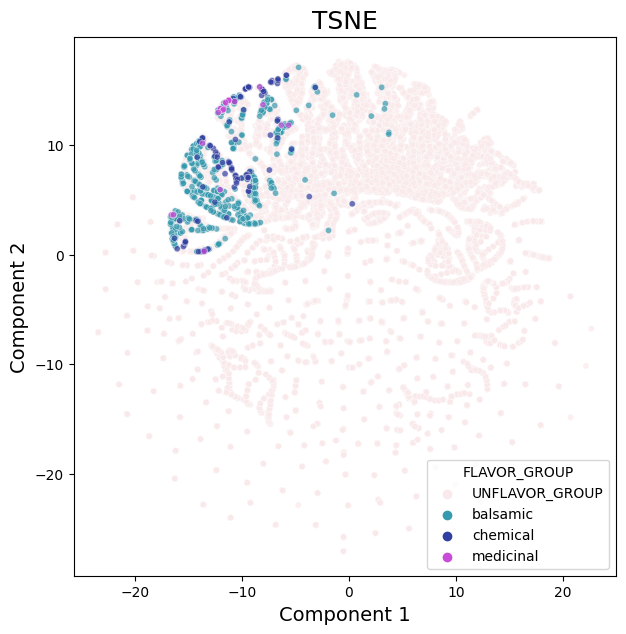

In [78]:
# Plot t-SNE
import matplotlib.pyplot as plt
plt.figure()
plt.figure(figsize=(7,7))
plt.xlabel("Component 1", fontsize=14)
plt.ylabel("Component 2", fontsize=14)
plt.title("TSNE",fontsize=18 )

import seaborn as sns
sns.scatterplot(
                x = tsne_dataset["component1"],
                y = tsne_dataset["component2"],
                hue = tsne_dataset["FLAVOR_GROUP"], #Labels
                alpha=0.7,
                s = 20,
                palette = ["#fae9ea","#3799ae","#323ea0", "#c94cd6" ]
                )
# Save figure
plt.savefig("Natural_remedies.jpg", dpi=300)